[[(434, 222), (321, 250), (274, 263), (171, 250), (447, 137), (398, 237), (182, 282), (147, 255), (192, 204), (194, 272), (147, 205), (308, 293), (417, 259), (182, 174), (358, 235), (208, 230), (332, 280), (463, 174), (400, 154), (443, 187), (413, 205), (422, 126), (374, 214), (136, 246), (385, 256), (166, 228), (389, 183), (252, 316), (349, 313), (393, 288), (137, 186), (253, 292), (249, 263), (204, 298), (221, 287), (312, 321), (435, 166)], [(244, 92), (123, 104), (271, 111), (106, 90), (192, 62), (84, 112), (220, 82), (56, 178), (286, 161), (308, 124), (231, 114), (47, 159), (128, 78), (64, 150), (299, 136), (261, 131), (155, 94), (275, 137), (272, 95), (101, 131), (242, 70), (191, 100), (154, 64), (80, 156), (47, 128)]]


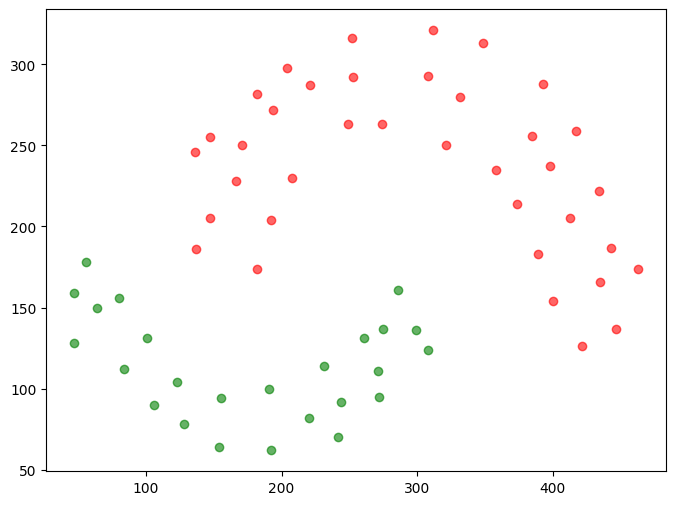

In [1]:
# @title Кластеризация поиском в глубину (DFS)
import numpy as np
from math import hypot # для вычисления расстояния между точками
import matplotlib.pyplot as plt

# Обход в глубину (DFS)
def dfs(graph, node, visited=None): # нода это вершина или узел (синонимы)
    if visited is None:
        visited = set()

    # Отметим текущий узел как посещенный
    visited.add(node)

    # Рекурсивно посетим всех соседей текущего узла
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

    return visited

# Поиск всех компонент
def find_connected_components(graph):
    components = set()
    unvisited_nodes = set(graph.keys())

    while unvisited_nodes:
        start_node = next(iter(unvisited_nodes))
        component = frozenset(dfs(graph, start_node))

        # Добавляем найденную компоненту к множеству и удаляем ее из непосещенных узлов
        components.add(component)

        unvisited_nodes -= component

    return components

# Данные из лекции
P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]
eps = 60

# Граф (список смежности / или список вершин) с присвоением имён каждой точке
g = {f'{i}': [] for i in range(len(P))} # создаём ключи по индексам и к ним пустые списки
for i in range(len(P)):
    for j in range(len(P)):
        if i != j:
            if hypot(P[i][0] - P[j][0], P[i][1] - P[j][1]) < eps:
                g[f'{i}'].append(f'{j}')

components_result = find_connected_components(g)

# Приводим к виду, как в лекции
clusters = [[P[int(i)] for i in component] for component in components_result]
print(clusters)

# Визуализация
colors = ['r', 'g']
plt.figure(figsize=(8, 6))

for i, xx in enumerate(clusters):
    xx = np.array(xx)
    if len(xx) > 0:
        plt.scatter(xx[:, 0], xx[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

In [33]:
# def in_eps(x, lst, eps, metric) -> int:
#     m = [metric(x, xk) for xk in lst if x != xk]
#     res = [1 if mm <= eps else 0 for mm in m]
#     return sum(res)
    
# def dbscan_(X, e, m, metric):
#     #unmarked, , num of clusters
#     U, N, a, clusters = X.copy(), [], 0, []
#     while U:
#         cur = np.random.choice(U) # take random element x \in U
#         neighs = in_eps(cur, U, e, metric)
#         if neighs < m:
#             pass
#         else:
#             clusters.append([cur])
#             a += 1
#             perebor = clusters + noise + U
#             for sub in perebor:
#                 if in_eps(sub, perebor, e, metric) >= m:
#                     clusters[-1].append(sub)
                
#     return

SyntaxError: expected ':' (3692184801.py, line 17)

array([], shape=(0, 2), dtype=int64)

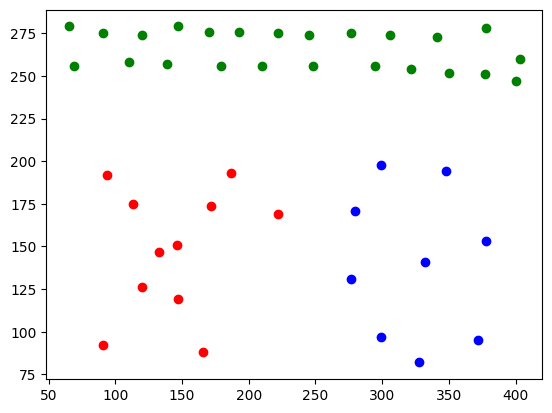

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
X = [(166, 88), (147, 119), (133, 147), (113, 175), (91, 92), (120, 126), (146, 151), (172, 174), (94, 192), (187, 193), (328, 82), (299, 97), (277, 131), (280, 171), (299, 198), (348, 194), (378, 153), (372, 95), (222, 169), (332, 141), (69, 256), (110, 258), (139, 257), (179, 256), (210, 256), (248, 256), (295, 256), (322, 254), (350, 252), (377, 251), (400, 247), (403, 260), (378, 278), (341, 273), (306, 274), (277, 275), (245, 274), (222, 275), (193, 276), (170, 276), (147, 279), (120, 274), (91, 275), (65, 279)]
X = np.array(X)

clustering = DBSCAN(eps=55, min_samples=3, metric='euclidean')
res = clustering.fit_predict(X)

X1, X2, X3, Noise = X[res==0], X[res==1], X[res==2], X[res==-1]

colors = ('red', 'blue', 'green', 'black')
col = iter(colors)
XX = [X1, X2, X3, Noise]
for cl in XX:
    plt.scatter(cl[:, 0], cl[:, 1], c=next(col))


In [27]:
import numpy as np
from sklearn.cluster import DBSCAN
from itertools import product as pr
# подобрать параметры так, чтобы количество кластеров было равно 3 и не было элементов с шумом
X = [(58, 138), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118),  (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (414, 90), (430, 100), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]
X = np.array(X)

# решаем перебором через itertools.product
epsilon = [x for x in range(1, 100, 5)]
MMM = [x for x in range(1, 100, 5)]
cycle = pr(epsilon, MMM)

for e, m in cycle:
    clustering = DBSCAN(eps=e, min_samples=m, metric='euclidean')
    res = clustering.fit_predict(X)
    if max(res) == 2 and not(-1 in res):
        # print(e, m, res)
        break
        

36 1 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1]


In [31]:
a = []
a.append([])
a.append(['a'])
a

[[], ['a']]